<a href="https://colab.research.google.com/github/Miftahul93/Pengembangan_Machine_Learning_Dicoding/blob/main/Lat_Membuat_dan_Melatih_Model_untuk_Memproses_Dataset_Gambar_dari_Dunia_Nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Membuat dan Melatih Model untuk Memproses Dataset Gambar dari Dunia Nyata**
Ketika Anda bertugas untuk mengembangkan model yang mampu mengenali gambar, hal yang paling umum ditemui adalah data yang akan Anda proses tidak memiliki ukuran dan format yang seragam. 

Untungnya library keras menyediakan ImageDataGenerator yang dapat mempermudah kita dalam memproses data untuk model kita. 

Nah tanpa menunda lagi, kita akan langsung latihan membuat model untuk memprediksi dataset chessman yang telah disebutkan sebelumnya.

In [1]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2021-08-03 09:44:38--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2021-08-03 09:44:38--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   151MB/s    in 

Selanjutnya kita perlu melakukan ekstraksi terhadap dataset yang kita unduh karena dataset dalam bentuk file zip.

In [2]:
# Unzip file
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Gunakan fungsi listdir dari kelas os untuk melihat direktori yang terdapat pada dataset. Dapat kita lihat bahwa terdapat 6 buah direktori pada dataset. Setiap direktori berisi gambar pion catur sesua dengan nama direktorinya.

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Knight', 'King', 'Bishop', 'Pawn', 'Queen']

Selanjutnya kita perlu melihat berapa banyak gambar pada setiap direktori. Dari output dapat dilihat bahwa jumlah sampel pada tiap direktori berbeda. Perlu diperhatikan juga dataset ini berukuran sangat kecil sehingga performa dari model mungkin tidak akan terlalu baik. Kita akan mencoba menggunakan augmentasi gambar untuk mengatasi masalah ini.

In [4]:
print('Total Pawn images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('Total Knight images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('Total Bishop images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('Total Rook images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))
print('Total Queen images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('Total King images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))


Total Pawn images :  107
Total Knight images :  106
Total Bishop images :  87
Total Rook images :  102
Total Queen images :  78
Total King images :  76


Kita dapat melihat contoh dari sebuah gambar pada dataset dengan menjalankan kode di bawah.

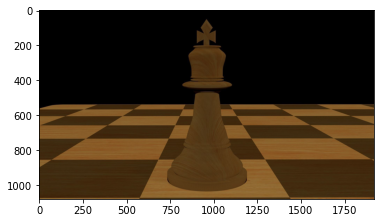

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

Selanjutnya kita impor ImageDataGenerator dan aplikasikan augmentasi gambar pada dataset kita. Perhatikan bahwa ada parameter yaitu validation split. Parameter ini akan dijelaskan pada paragraf berikutnya.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                   validation_split = 0.1) # set validation split

Dataset yang kita miliki hanya terdiri dari 1 buah direktori dan tidak terbagi menjadi direktori training dan testing. Tapi tenang, dengan ImageDataGenerator kita tidak perlu susah payah membagi direktori secara manual, cukup dengan menggunakan parameter validation_split yang disebut pada paragraf sebelumnya. Dengan parameter tersebut, kita hanya cukup memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation.

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = 'categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same direktoru as training data
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


Selanjutnya, kita buat arsitektur dari model kita. Untuk model ini kita menggunakan 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron.

In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.4),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.4),

                                    # Flatten the result to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 
                                    tf.keras.layers.Dense(6, activation='softmax')
])

Setelah arsitektur dibuat, tentukan optimizer dan loss yang akan digunakan model

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Terakhir, panggil fungsi fit untuk melatih model kita.

In [10]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 2)

Epoch 1/50
63/63 - 41s - loss: 1.9977 - accuracy: 0.1663 - val_loss: 1.7882 - val_accuracy: 0.1731
Epoch 2/50
63/63 - 11s - loss: 1.7899 - accuracy: 0.1743 - val_loss: 1.7840 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 11s - loss: 1.7852 - accuracy: 0.1904 - val_loss: 1.7800 - val_accuracy: 0.1923
Epoch 4/50
63/63 - 11s - loss: 1.7809 - accuracy: 0.1984 - val_loss: 1.7743 - val_accuracy: 0.3077
Epoch 5/50
63/63 - 11s - loss: 1.7553 - accuracy: 0.2224 - val_loss: 1.7829 - val_accuracy: 0.1923
Epoch 6/50
63/63 - 11s - loss: 1.7293 - accuracy: 0.2565 - val_loss: 1.8020 - val_accuracy: 0.2308
Epoch 7/50
63/63 - 11s - loss: 1.6827 - accuracy: 0.2766 - val_loss: 1.7126 - val_accuracy: 0.3077
Epoch 8/50
63/63 - 11s - loss: 1.6047 - accuracy: 0.3287 - val_loss: 1.6942 - val_accuracy: 0.1923
Epoch 9/50
63/63 - 11s - loss: 1.5787 - accuracy: 0.3407 - val_loss: 1.6539 - val_accuracy: 0.3077
Epoch 10/50
63/63 - 11s - loss: 1.5680 - accuracy: 0.3707 - val_loss: 1.5877 - val_accuracy: 0.3654
Epoch 11/

Anda juga dapat membuat plot akurasi dari model menggunakan kode berikut.

<function matplotlib.pyplot.show>

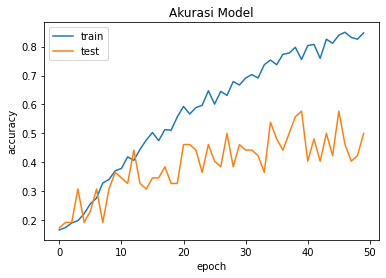

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

Untuk membuat plot loss Anda cukup menjalankan kode berikut.

<function matplotlib.pyplot.show>

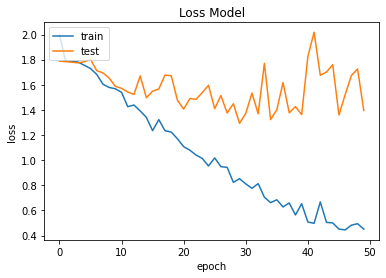

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show